#### Imports and useful models

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from utils import *

/home/webmaster/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
net = cv2.dnn.readNetFromCaffe(res_prototxt, res_model)

#### 0. What to expect:

The following code will allow you to do the following:
- Detect whether a person is wearing a mask: Accuracy = 99.98%
<br><br>
- Detect the gender:
     - For non-masked people: Accuracy = 98.45%
     - For masked people: Accuracy = 96.16%
     - A global classifier that detects whether or not a person is wearing a mask is used to identify whether the person is wearing a mask or not, then call the appropriate model.
<br><br>
- Detect Age range (age ranges are for distinct intervales):
     - For females: Accuracy = 67.85%
     - For males: Accuracy = 68.33%

#### 1. Mask Wearing Classification

In [4]:
mask_detector = load_learner('inference_models/mask_detector-model.pkl')

Prediction: True
Is the person wearing a mask: With mask


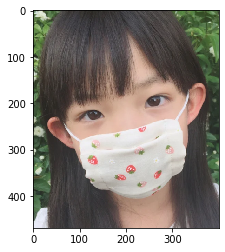

In [15]:
my_file = "800_kid_with_mask.webp"

processed_file = process_image(my_file, net)
img = mpimg.imread(processed_file)
plt.imshow(img)
pred = mask_detector.predict(processed_file)[0]

print("Prediction:", pred)
print("Is the person wearing a mask:", get_mask_stat(pred))

#### 2. Gender Detection

##### a. Non-masked people

In [6]:
non_masked_gender_detector = load_learner('inference_models/gender_no_mask-model.pkl')

Prediction: female


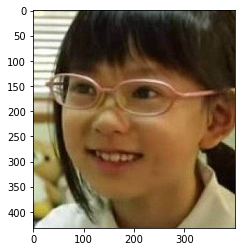

In [7]:
my_file = "800_kid.jpg"
processed_file = process_image(my_file, net)
img = mpimg.imread(processed_file)
plt.imshow(img)
pred = non_masked_gender_detector.predict(processed_file)[0]

print("Prediction:", pred)

##### b. Masked people

In [8]:
masked_gender_detector = load_learner('inference_models/gender_mask-model.pkl')

Prediction: female


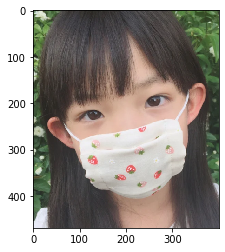

In [9]:
my_file = "800_kid_with_mask.webp"
processed_file = process_image(my_file, net)
img = mpimg.imread(processed_file)
plt.imshow(img)
pred = masked_gender_detector.predict(processed_file)[0]

print("Prediction:", pred)

##### c. Global (regardless of the person wearing a mask or not)

Prediction: male


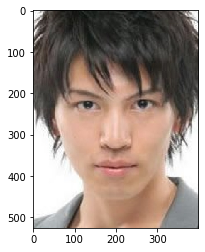

In [10]:
my_file = "800_young_man.jpg"
processed_file = process_image(my_file, net)
img = mpimg.imread(processed_file)
plt.imshow(img)

is_masked = mask_detector.predict(processed_file)[0]

if is_masked == 'True':
    pred = masked_gender_detector.predict(processed_file)[0]
elif is_masked == 'False':
    pred = non_masked_gender_detector.predict(processed_file)[0]


print("Prediction:", pred)

#### 3. Age Range Detection

##### a. For females

In [11]:
females_age_detector = load_learner('inference_models/AR2_f-model.pkl')

Prediction: (15, 20)


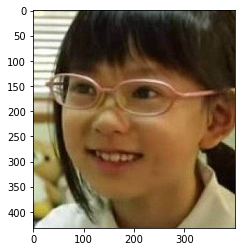

In [12]:
my_file = "800_kid.jpg"
processed_file = process_image(my_file, net)
img = mpimg.imread(processed_file)
plt.imshow(img)
pred = int(females_age_detector.predict(processed_file)[0])
age_range = get_age_range(pred, age_classes_2)

print("Prediction:", age_range)

##### b. For males

In [13]:
males_age_detector = load_learner('inference_models/AR2_m-model.pkl')

Prediction: (60, 99)


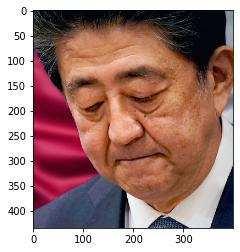

In [14]:
my_file = "800_abe_san.jpg"
processed_file = process_image(my_file, net)
img = mpimg.imread(processed_file)
plt.imshow(img)
pred = int(males_age_detector.predict(processed_file)[0])
age_range = get_age_range(pred, age_classes_2)

print("Prediction:", age_range)

##### c. Global (regardless of the person wearing a mask or not)

Prediction: (25, 32)


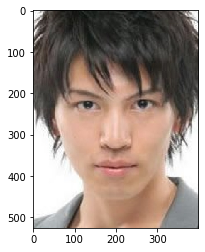

In [21]:
my_file = "800_young_man.jpg"
processed_file = process_image(my_file, net)
img = mpimg.imread(processed_file)
plt.imshow(img)

is_masked = mask_detector.predict(processed_file)[0]

if is_masked == 'True':
    gen_pred = masked_gender_detector.predict(processed_file)[0]
    
elif is_masked == 'False':
    gen_pred = non_masked_gender_detector.predict(processed_file)[0]
    
if gen_pred == 'female':
    pred = int(females_age_detector.predict(processed_file)[0])
    
elif gen_pred == 'male':
    pred = int(males_age_detector.predict(processed_file)[0])


age_range = get_age_range(pred, age_classes_2)
print("Prediction:", age_range)